<a href="https://colab.research.google.com/github/abhay-2108/Credit-Card-Fraud-Detection-Using-Autoencoders/blob/main/credit_fraud_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.cluster import KMeans

In [ ]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


## EDA

In [ ]:
print(train_df.shape)
print(test_df.shape)

(7815, 23)
(7798, 23)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7798 non-null   int64  
 1   trans_date_trans_time  7798 non-null   object 
 2   cc_num                 7798 non-null   int64  
 3   merchant               7798 non-null   object 
 4   category               7798 non-null   object 
 5   amt                    7798 non-null   float64
 6   first                  7798 non-null   object 
 7   last                   7798 non-null   object 
 8   gender                 7798 non-null   object 
 9   street                 7798 non-null   object 
 10  city                   7798 non-null   object 
 11  state                  7798 non-null   object 
 12  zip                    7798 non-null   int64  
 13  lat                    7798 non-null   float64
 14  long                   7798 non-null   float64
 15  city

In [ ]:
print("Missing values in Train Dataset:")
print(train_df.isnull().sum())

Missing values in Train Dataset:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [ ]:
print("Missing values in Test Dataset:")
print(test_df.isnull().sum())

Missing values in Test Dataset:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [ ]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7815.00000,7.815000e+03,7815.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000
mean,3907.00000,4.078117e+17,68.661363,49479.396340,38.595821,-90.688408,8.823451e+04,1.325583e+09,38.599153,-90.685832,0.005759
std,2256.14051,1.295068e+18,115.530027,27184.827244,5.198199,14.512405,2.944470e+05,1.359720e+05,5.226026,14.532152,0.075673
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1953.50000,1.800184e+14,9.785000,26041.000000,34.852700,-97.235100,7.410000e+02,1.325448e+09,34.913072,-97.322865,0.000000
50%,3907.00000,3.518759e+15,48.490000,49259.000000,39.376400,-87.764400,2.395000e+03,1.325583e+09,39.392224,-87.772889,0.000000
75%,5860.50000,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,1.905400e+04,1.325704e+09,41.923981,-80.187209,0.000000
max,7814.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325815e+09,66.645176,-66.967742,1.000000


In [ ]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7798.000000,7.798000e+03,7798.000000,7798.000000,7798.000000,7798.000000,7.798000e+03,7.797000e+03,7797.000000,7797.000000,7797.000000
mean,3898.500000,4.045046e+17,68.658160,48467.937548,38.486395,-89.976821,9.835233e+04,1.371903e+09,38.467741,-89.975801,0.002822
std,2251.233033,1.293290e+18,122.077687,26765.475620,5.088719,13.600215,3.330378e+05,4.968043e+04,5.124246,13.621047,0.053047
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,1949.250000,1.800462e+14,9.450000,26237.000000,34.509100,-96.601200,7.722500e+02,1.371858e+09,34.627939,-96.577261,0.000000
50%,3898.500000,3.518235e+15,46.345000,47987.000000,39.342600,-86.947500,2.691000e+03,1.371908e+09,39.320289,-87.193562,0.000000
75%,5847.750000,4.642255e+15,81.600000,72011.000000,42.015800,-80.175200,2.219100e+04,1.371941e+09,42.011157,-80.269768,0.000000
max,7797.000000,4.992346e+18,3204.980000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371993e+09,65.951727,-67.122946,1.000000


# **Temporal Features**

In [ ]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
train_df['trans_date_trans_time']

,trans_date_trans_time
0,2019-01-01 00:00:18
1,2019-01-01 00:00:44
2,2019-01-01 00:00:51
3,2019-01-01 00:01:16
4,2019-01-01 00:03:06
...,...
7810,2019-01-06 01:59:19
7811,2019-01-06 01:59:25
7812,2019-01-06 02:00:33
7813,2019-01-06 02:01:43


In [ ]:
# Extract day of week and hour of day
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek   # Monday=0, Sunday=6
train_df['hour_of_day'] = train_df['trans_date_trans_time'].dt.hour
test_df['day_of_week'] = test_df['trans_date_trans_time'].dt.dayofweek
test_df['hour_of_day'] = test_df['trans_date_trans_time'].dt.hour

In [ ]:
# Calculate time since last transaction per card (using cc_num as identifier)
train_df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)
train_df['time_since_last'] = train_df.groupby('cc_num')['trans_date_trans_time'].diff().fillna(pd.Timedelta(seconds=0))
# Convert time difference to seconds
train_df['time_since_last'] = train_df['time_since_last'].dt.total_seconds()

In [ ]:
test_df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)
test_df['time_since_last'] = test_df.groupby('cc_num')['trans_date_trans_time'].diff().fillna(pd.Timedelta(seconds=0))
test_df['time_since_last'] = test_df['time_since_last'].dt.total_seconds()

In [ ]:
#average amount in the last 5 transactions per card:
train_df['amt_rolling_mean'] = train_df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
# Average amount in the last 5 transactions per card
test_df['amt_rolling_mean'] = test_df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last,amt_rolling_mean
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,98e3dcf98101146a577f85a34e58feec,1.325422e+09,43.974711,-109.741904,0.0,1,12,0.0,7.270
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,498120fc45d277f7c88e3dba79c33865,1.325494e+09,42.018766,-109.044172,0.0,2,8,71862.0,30.105
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,95f514bb993151347c7acdf8505c3d62,1.325494e+09,42.961335,-109.157564,0.0,2,8,159.0,47.430
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1.325508e+09,42.228227,-108.747683,0.0,2,12,13838.0,44.270
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1.325510e+09,43.321745,-108.091143,0.0,2,13,1952.0,40.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,3109,2019-01-02 16:42:30,4992346398065154184,fraud_Torphy-Kertzmann,health_fitness,24.13,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,fa4e479583c59a1b310e9176df42af0f,1.325523e+09,42.171380,-88.480461,0.0,2,16,6783.0,59.850
4629,4629,2019-01-03 21:58:53,4992346398065154184,fraud_Lind-Buckridge,entertainment,78.20,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,c53bdb79508cce986b54e11b236fa0ad,1.325628e+09,40.672116,-89.646768,0.0,3,21,105383.0,51.598
6337,6337,2019-01-05 02:09:15,4992346398065154184,fraud_Jaskolski-Vandervort,misc_net,262.85,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,5190eb750f972a359605d87d99a4184a,1.325729e+09,40.388552,-89.354357,0.0,5,2,101422.0,95.070
7017,7017,2019-01-05 15:34:01,4992346398065154184,fraud_Cummerata-Hilpert,entertainment,2.15,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,65e72adf3fdbea93fe358fc151471eb8,1.325778e+09,42.170795,-90.156072,0.0,5,15,48286.0,93.620


In [ ]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last,amt_rolling_mean
157,157,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,f21e1a09f59c50a66735409308285b1d,1.371820e+09,42.945526,-108.530901,0.0,6,13,0.0,124.660000
741,741,2020-06-21 16:25:36,60416207185,fraud_Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,08f67c9765438973006f8250351d8c1f,1.371832e+09,42.193130,-108.682054,0.0,6,16,11994.0,101.590000
3047,3047,2020-06-22 07:58:33,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,ca1f04d9d549c507356ffa8f9b43d81f,1.371888e+09,43.932724,-109.699794,0.0,0,7,55977.0,89.476667
4351,4351,2020-06-22 15:32:31,60416207185,fraud_Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,d671d98fded8ca75d799959a444577a5,1.371915e+09,43.546064,-109.212939,0.0,0,15,27238.0,89.042500
7695,7695,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,...,1986-02-17,86d346444b5b262159976aa4d8b64fbb,1.371991e+09,42.876538,-109.333220,0.0,1,12,75383.0,100.838000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,6909,2020-06-23 06:26:44,4992346398065154184,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,56.94,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,c1c8d0c9e248495c5579dc50aee8f758,1.371969e+09,41.789739,-89.438799,0.0,1,6,12391.0,46.648000
6987,6987,2020-06-23 06:59:18,4992346398065154184,fraud_Emard Inc,gas_transport,60.38,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,0cc0c63367023deb443f3456c1595bc5,1.371971e+09,41.679105,-89.426621,0.0,1,6,1954.0,58.246000
7447,7447,2020-06-23 10:36:31,4992346398065154184,fraud_Rodriguez Group,gas_transport,54.43,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,6f86208bc31d683dfb796bb89c25642a,1.371984e+09,41.790941,-88.731941,0.0,1,10,13033.0,62.046000
7729,7729,2020-06-23 12:43:34,4992346398065154184,fraud_Weimann-Lockman,kids_pets,85.75,Benjamin,Kim,M,920 Patrick Light,...,1956-01-09,1ce87fbee4d38b15a60573754ed9cf6b,1.371991e+09,40.835356,-89.671628,0.0,1,12,7623.0,78.744000


## *Using Geospatial Features: Distance between Merchant and Customer*

In [ ]:
# aversine distance between two (lat, long) pairs
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [ ]:
# Compute distance between customer location and merchant location
train_df['geo_distance_km'] = haversine_distance(
    train_df['lat'], train_df['long'],
    train_df['merch_lat'], train_df['merch_long']
)

In [ ]:
# Compute distance between customer location and merchant location
test_df['geo_distance_km'] = haversine_distance(
    test_df['lat'], test_df['long'],
    test_df['merch_lat'], test_df['merch_long']
)


In [ ]:
# we cluster merchant locations into 5 regions (for example)
merchant_locations = train_df[['merch_lat', 'merch_long']].dropna().values
kmeans = KMeans(n_clusters=5, random_state=42)

train_df[['merch_lat', 'merch_long']] = train_df[['merch_lat', 'merch_long']].fillna(0)
train_df['merchant_region'] = kmeans.fit_predict(train_df[['merch_lat', 'merch_long']])
test_df[['merch_lat', 'merch_long']] = test_df[['merch_lat', 'merch_long']].fillna(0)
test_df['merchant_region'] = kmeans.predict(test_df[['merch_lat', 'merch_long']])

In [ ]:
numerical_features = train_df.select_dtypes(include=[np.number]).columns
categorical_features = train_df.select_dtypes(include=[object]).columns

In [ ]:
numerical_features = train_df.select_dtypes(include=[np.number]).columns
for col in numerical_features:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())

In [ ]:
print(numerical_features)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'day_of_week',
       'hour_of_day', 'time_since_last', 'amt_rolling_mean', 'geo_distance_km',
       'merchant_region'],
      dtype='object')


In [ ]:
print(categorical_features)

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Standardizing the numerical features
scalar = StandardScaler()
train_df[numerical_features] = scalar.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scalar.transform(test_df[numerical_features])

In [ ]:
# Encoding the categorical features
encoders = {}

for col in categorical_features:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])

    encoders[col] = encoder
    test_df[col] = test_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

In [ ]:
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last,amt_rolling_mean,geo_distance_km,merchant_region
1017,-1.281031,2019-01-01 12:47:15,-0.314916,-0.241534,0.474169,-0.531423,0.538599,-1.062143,-0.904125,1.723473,...,-1.186279,1.026114,-1.309013,-0.076112,-1.181511,-0.095172,-0.764997,-0.868332,1.776831,-1.679984
2724,-0.524380,2019-01-02 08:44:57,-0.314916,-1.493935,-1.077927,-0.136089,0.538599,-1.062143,-0.904125,1.723473,...,-0.657706,0.653096,-1.261113,-0.076112,-0.543309,-0.670622,0.730923,-0.546523,1.178309,-1.679984
2726,-0.523494,2019-01-02 08:47:36,-0.314916,0.289484,-1.077927,0.116156,0.538599,-1.062143,-0.904125,1.723473,...,-0.656537,0.832853,-1.268897,-0.076112,-0.543309,-0.670622,-0.761687,-0.302366,-1.884720,-1.679984
2882,-0.454345,2019-01-02 12:38:14,-0.314916,-1.078138,0.215486,-0.293201,0.538599,-1.062143,-0.904125,1.723473,...,-0.554753,0.693042,-1.240759,-0.076112,-0.543309,-0.095172,-0.476937,-0.346899,0.378839,-1.679984
2907,-0.443263,2019-01-02 13:10:46,-0.314916,-1.503954,-0.043197,-0.359076,0.538599,-1.062143,-0.904125,1.723473,...,-0.540395,0.901587,-1.195687,-0.076112,-0.543309,0.048690,-0.724363,-0.395068,-0.070684,-1.679984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,-0.353724,2019-01-02 16:42:30,3.540222,1.436683,-0.301879,-0.385477,-1.521296,-0.114711,1.104899,1.485019,...,-0.446952,0.682201,0.150604,-0.076112,-0.543309,0.480278,-0.623798,-0.127333,1.749678,-0.700860
4629,0.320036,2019-01-03 21:58:53,3.540222,0.244397,-1.595292,0.082569,-1.521296,-0.114711,1.104899,1.485019,...,0.328182,0.396277,0.070536,-0.076112,0.094893,1.199590,1.428715,-0.243627,-0.344536,-0.700860
6337,1.077129,2019-01-05 02:09:15,3.540222,-0.301649,0.474169,1.680957,-1.521296,-0.114711,1.104899,1.485019,...,1.074180,0.342198,0.090610,-0.076112,1.371298,-1.533797,1.346260,0.369015,0.405381,-0.700860
7017,1.378548,2019-01-05 15:34:01,3.540222,-1.128234,-1.595292,-0.575743,-1.521296,-0.114711,1.104899,1.485019,...,1.429343,0.682090,0.035572,-0.076112,1.371298,0.336415,0.240152,0.348580,2.051338,-0.700860


In [ ]:
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,time_since_last,amt_rolling_mean,geo_distance_km,merchant_region
157,-1.662237,2020-06-21 13:05:42,-0.314916,0.104129,-0.043197,0.484742,0.538599,-1.062143,-0.904125,1.723473,...,340.088627,0.829839,-1.225876,-0.076112,2.009500,0.048690,-0.764997,0.786020,-1.584727,-1.679984
741,-1.403371,2020-06-21 16:25:36,-0.314916,-0.582187,0.732851,0.085339,0.538599,-1.062143,-0.904125,1.723473,...,340.176847,0.686349,-1.236253,-0.076112,2.009500,0.480278,-0.515323,0.460900,0.542809,-1.679984
3047,-0.381206,2020-06-22 07:58:33,-0.314916,-1.193359,-1.077927,-0.029530,0.538599,-1.062143,-0.904125,1.723473,...,340.588580,1.018107,-1.306122,-0.076112,-1.819714,-0.814484,0.400252,0.290189,1.577911,-1.679984
4351,0.196809,2020-06-22 15:32:31,-0.314916,0.159234,0.215486,0.165151,0.538599,-1.062143,-0.904125,1.723473,...,340.788926,0.944367,-1.272699,-0.076112,-1.819714,0.336415,-0.197995,0.284070,-0.375141,-1.679984
7695,1.679081,2020-06-23 12:28:54,-0.314916,0.204321,0.991534,0.686953,0.538599,-1.062143,-0.904125,1.723473,...,341.343398,0.816682,-1.280956,-0.076112,-1.181511,-0.095172,0.804218,0.450302,-1.312956,-1.679984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,1.330676,2020-06-23 06:26:44,3.540222,-0.942878,-1.077927,-0.101464,-1.521296,-0.114711,1.104899,1.485019,...,341.183565,0.609418,0.084813,-0.076112,-1.181511,-0.958347,-0.507059,-0.313386,-0.182312,-0.700860
6987,1.365251,2020-06-23 06:59:18,3.540222,-0.922840,-1.077927,-0.071686,-1.521296,-0.114711,1.104899,1.485019,...,341.197938,0.588319,0.085649,-0.076112,-1.181511,-0.958347,-0.724321,-0.149938,-0.601037,-0.700860
7447,1.569152,2020-06-23 10:36:31,3.540222,0.905665,-1.077927,-0.123191,-1.521296,-0.114711,1.104899,1.485019,...,341.293801,0.609648,0.133340,-0.076112,-1.181511,-0.382897,-0.493695,-0.096385,0.122078,-0.700860
7729,1.694152,2020-06-23 12:43:34,3.540222,1.596990,0.215486,0.147925,-1.521296,-0.114711,1.104899,1.485019,...,341.349871,0.427408,0.068829,-0.076112,-1.181511,-0.095172,-0.606312,0.138936,-0.790030,-0.700860


# Visualize the data

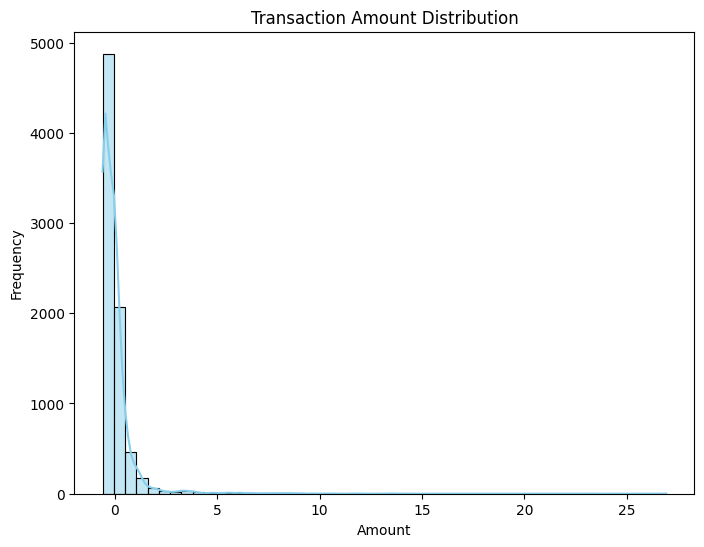

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(train_df['amt'], bins=50, kde=True, color='skyblue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

<ipython-input-52-6eff2f4316e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=train_df, palette='Set2')


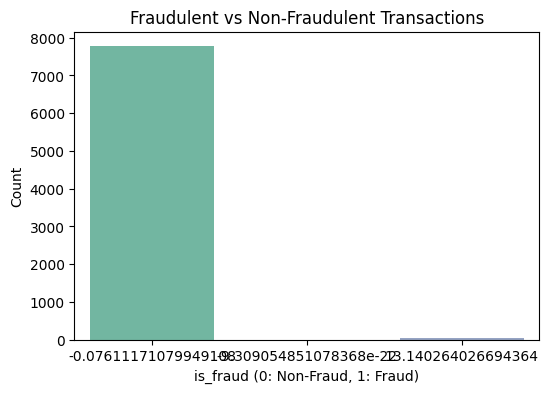

In [ ]:
# Visualize Fraud vs Non-Fraud counts
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=train_df, palette='Set2')
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("is_fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

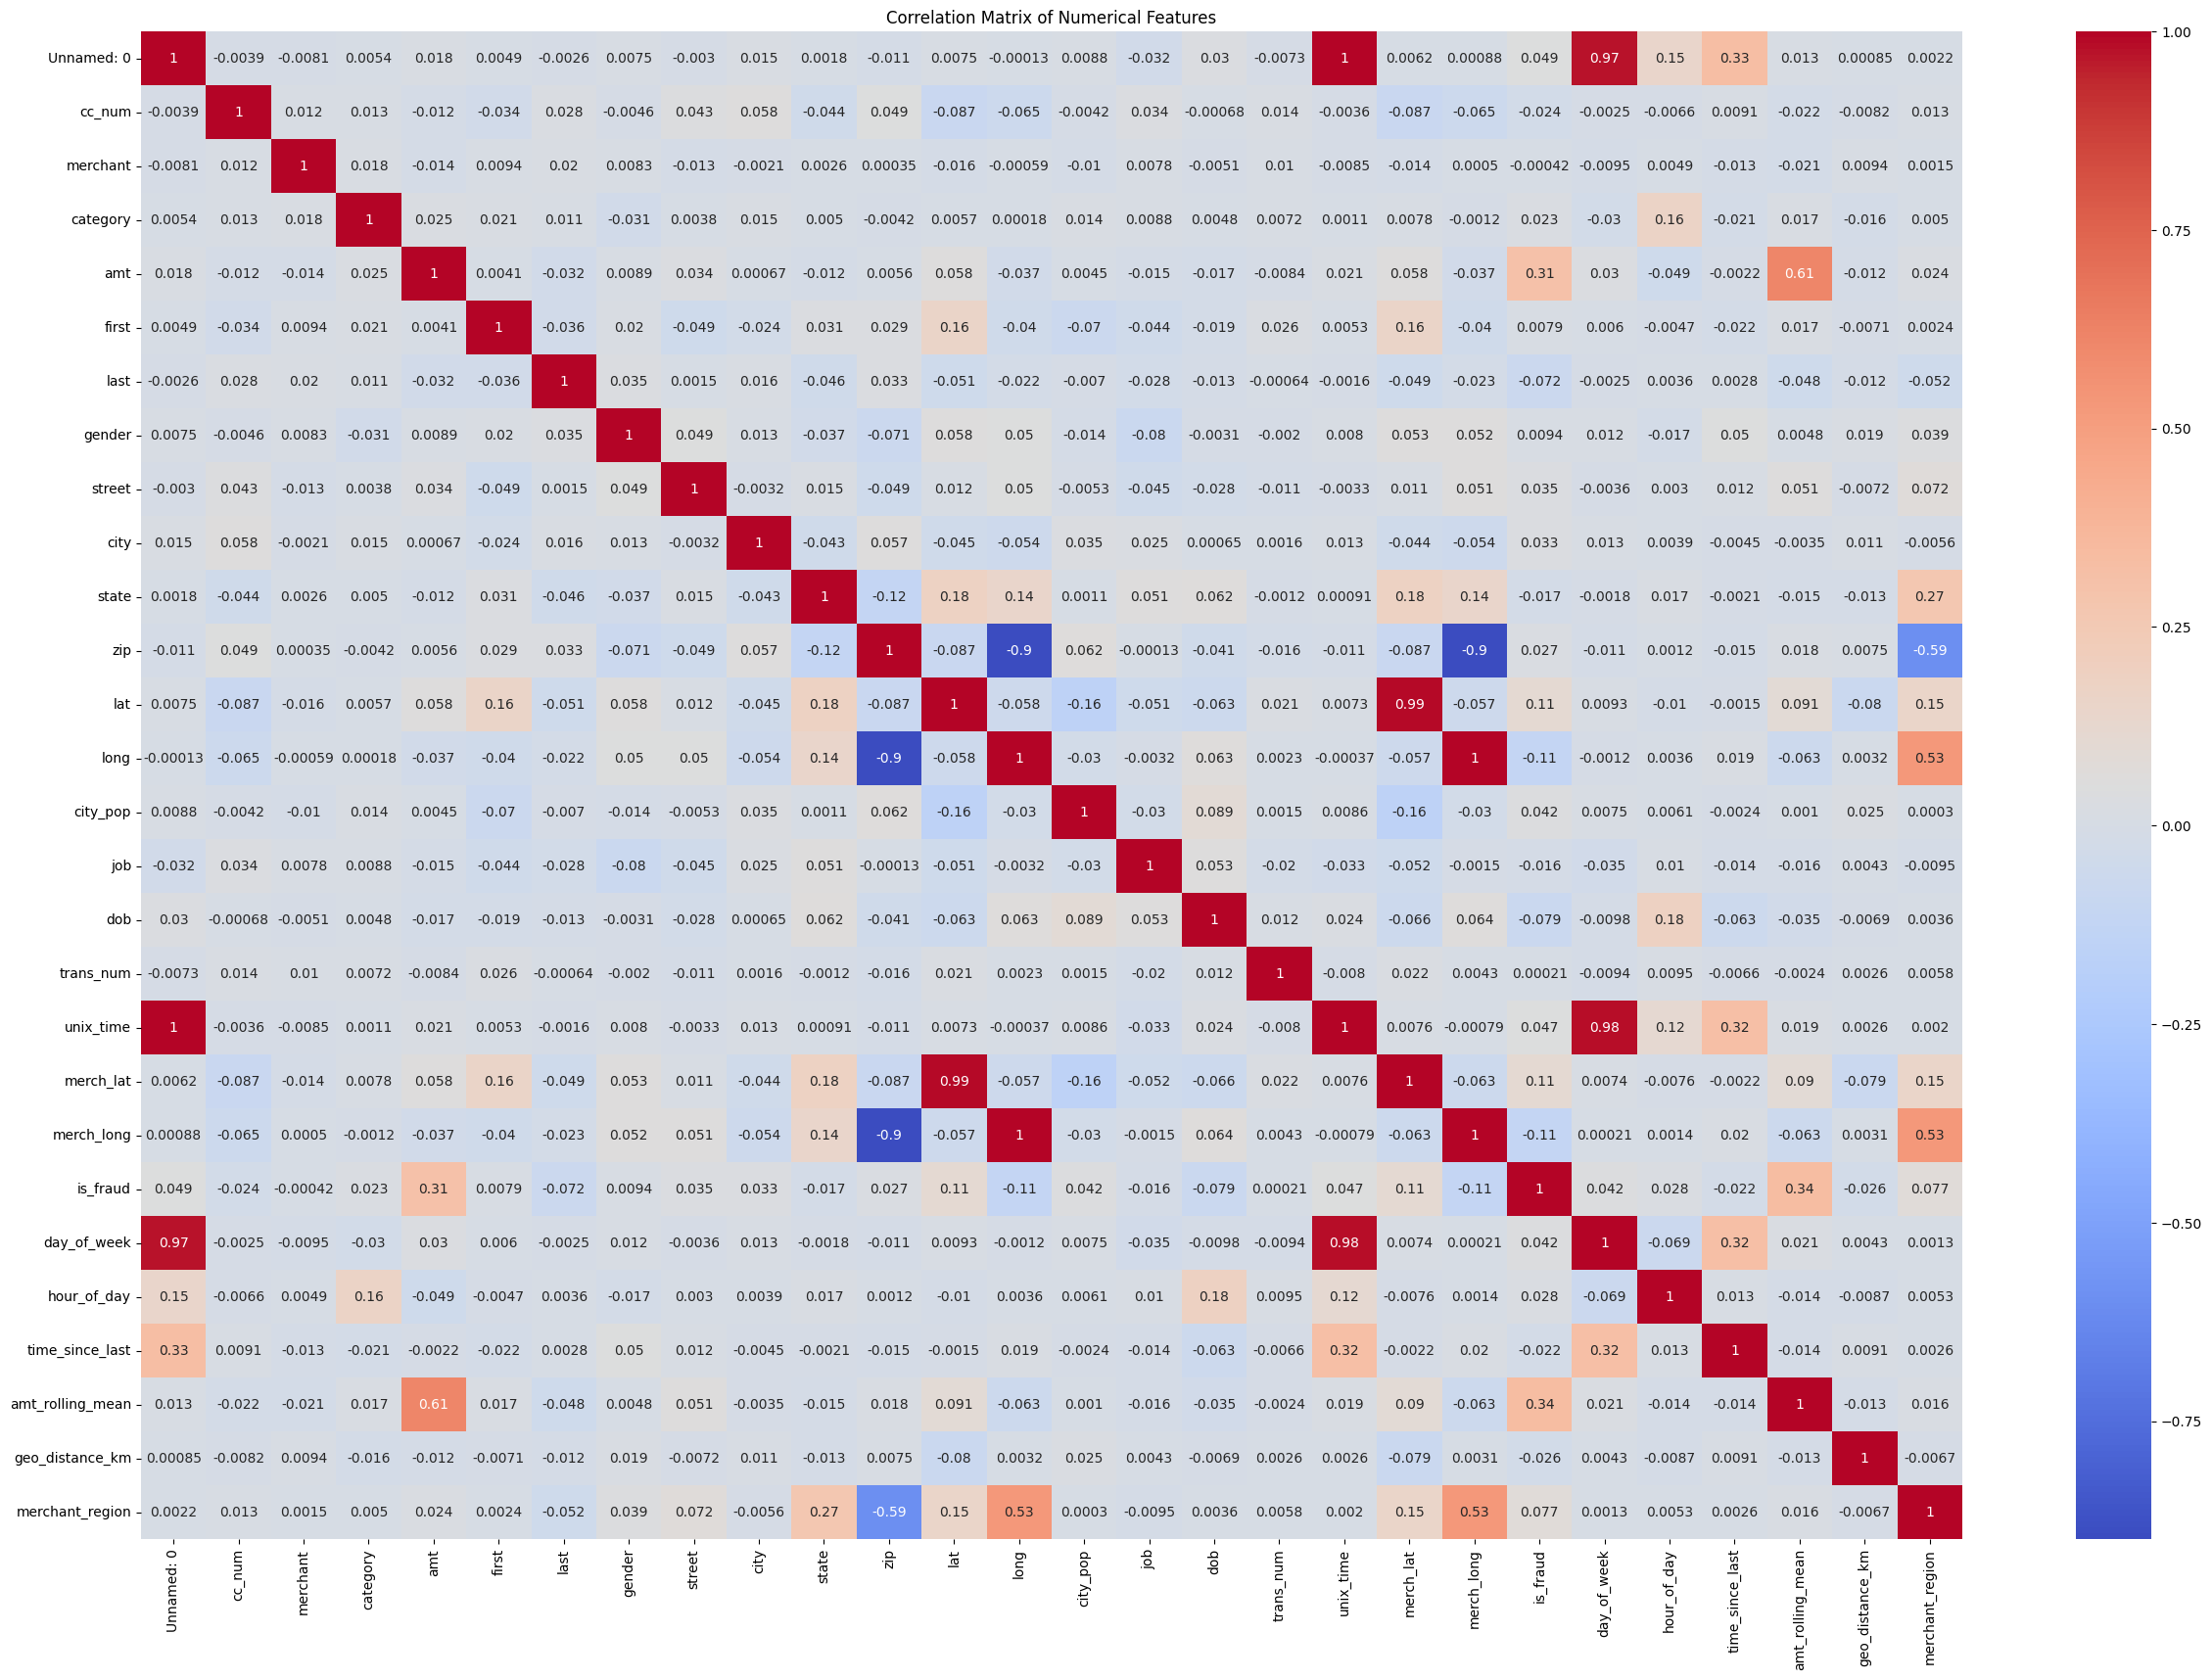

In [ ]:
# Plot a correlation heatmap for the selected numerical features
plt.figure(figsize=(30,20))
corr_matrix = train_df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

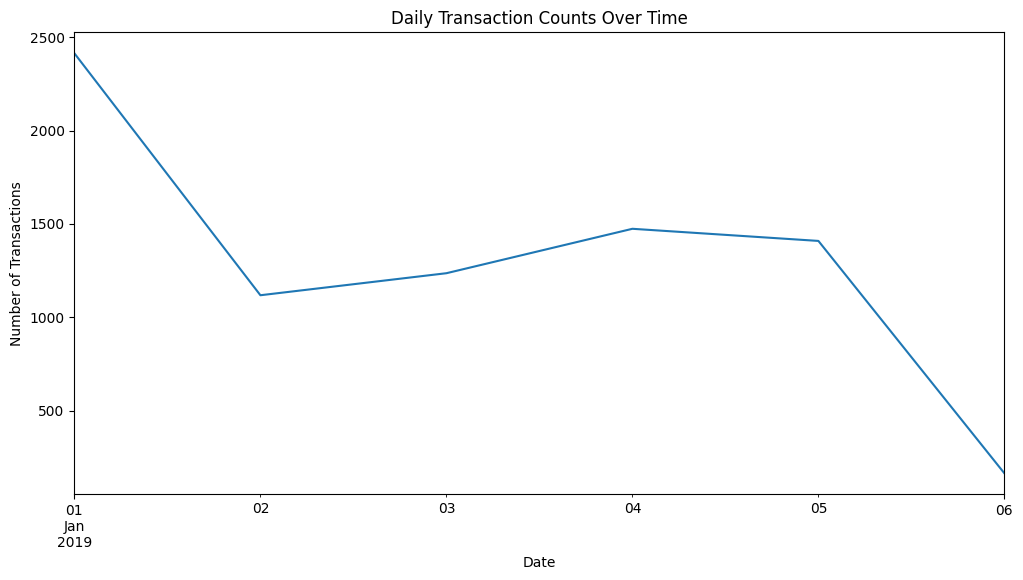

In [ ]:
# visualize transations over time
plt.figure(figsize=(12,6))
train_df.set_index('trans_date_trans_time')['amt'].resample('D').count().plot()
plt.title("Daily Transaction Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

<ipython-input-57-5e9e9178b609>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')


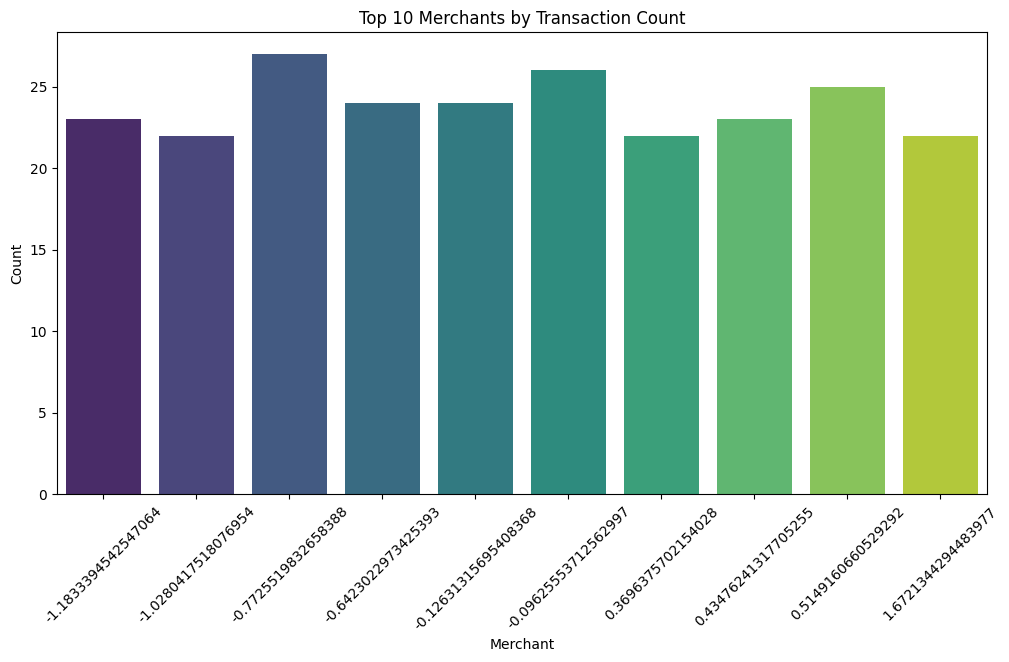

In [ ]:
# Visualize top 10 merchants by transaction count
plt.figure(figsize=(12,6))
top_merchants = train_df['merchant'].value_counts().iloc[:10]
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='viridis')
plt.title("Top 10 Merchants by Transaction Count")
plt.xlabel("Merchant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-58-976acc454be9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=train_df, palette='coolwarm')


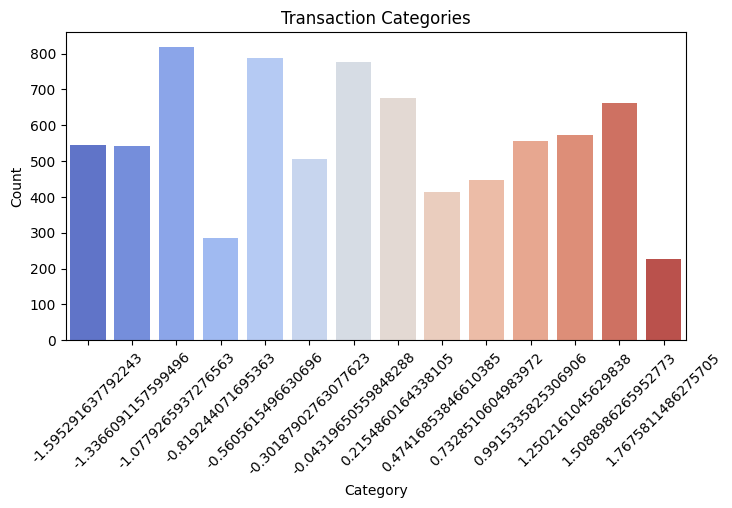

In [ ]:
# Visualize categorical features (e.g., category, gender, job)
plt.figure(figsize=(8,4))
sns.countplot(x='category', data=train_df, palette='coolwarm')
plt.title("Transaction Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-9f6574d32811>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=train_df, palette='Set3')


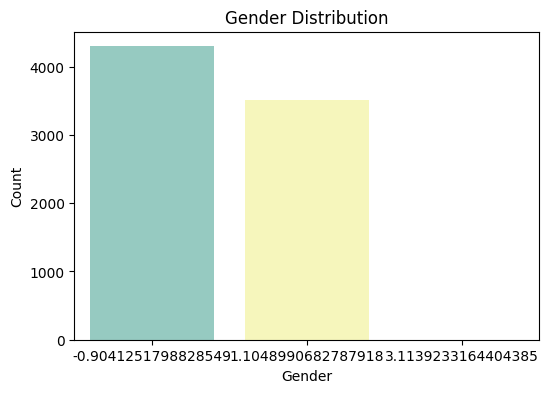

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=train_df, palette='Set3')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<ipython-input-60-6091a056c0ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='magma')


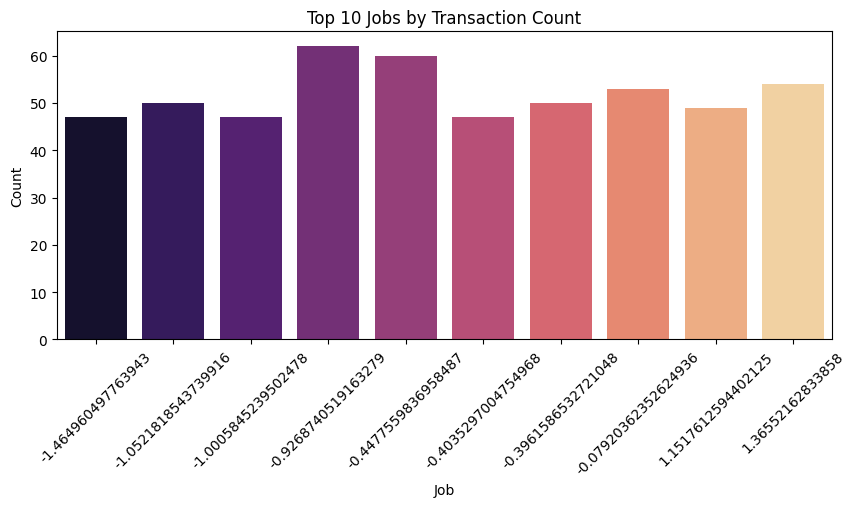

In [ ]:
plt.figure(figsize=(10,4))
top_jobs = train_df['job'].value_counts().iloc[:10]
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='magma')
plt.title("Top 10 Jobs by Transaction Count")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Autoencoder Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1_l2

In [ ]:
from sklearn.model_selection import train_test_split

features = train_df.drop(columns=['is_fraud', 'trans_date_trans_time'])  # Exclude 'is_fraud'

X_train, X_val, _, _ = train_test_split(features, train_df['is_fraud'], test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
label_encoder = encoder

In [ ]:

input_dim = X_train.shape[1]

# Define the Autoencoder architecture
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(64, activity_regularizer=l1_l2(1e-5, 1e-4))(input_layer)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)
encoder = Dropout(0.2)(encoder)

encoder = Dense(32, activity_regularizer=l1_l2(1e-5, 1e-4))(encoder)
encoder = BatchNormalization()(encoder)
encoder = LeakyReLU()(encoder)

bottleneck = Dense(16, activity_regularizer=l1_l2(1e-5, 1e-4))(encoder)  # Latent space

# Decoder
decoder = Dense(32)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

decoder = Dense(64)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
decoder = Dropout(0.2)(decoder)

output_layer = Dense(input_dim, activation='linear')(decoder)  # Output layer

# Define and compile the autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 27)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,579 (37.42 KB)

 Trainable params: 9,195 (35.92 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, X_val),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.3490 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7894 - val_loss: 0.5747 - learning_rate: 0.0010
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6335 - val_loss: 0.4748 - learning_rate: 0.0010
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5415 - val_loss: 0.4090 - learning_rate: 0.0010
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4758 - val_loss: 0.3634 - learning_rate: 0.0010
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4336 - val_loss: 0.3281 - learning_rate: 0.0010
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4091 - val_loss: 0.3033 - learning_rate: 0.0010
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3946 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3774 - val_loss: 0.2668 - learning_rate: 0.0010
E

In [ ]:
# Compute reconstruction errors
X_val_pred = autoencoder.predict(X_val)
reconstruction_errors = np.mean(np.abs(X_val - X_val_pred), axis=1)

# Determine the threshold using mean + 2 standard deviations
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)
print(f"Reconstruction Error Threshold: {threshold}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Reconstruction Error Threshold: 0.380976166091332


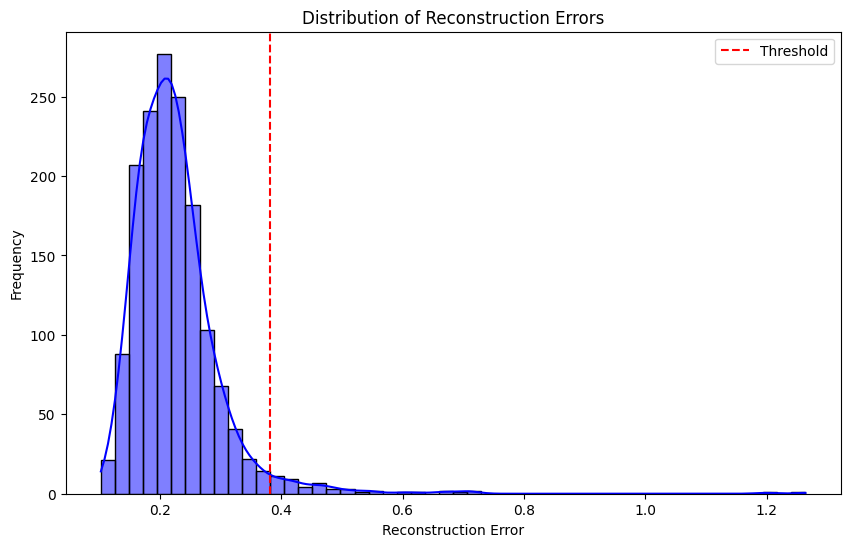

In [ ]:
# Plot distribution of errors
plt.figure(figsize=(10,6))
sns.histplot(reconstruction_errors, bins=50, kde=True, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', label='Threshold')
plt.title("Distribution of Reconstruction Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


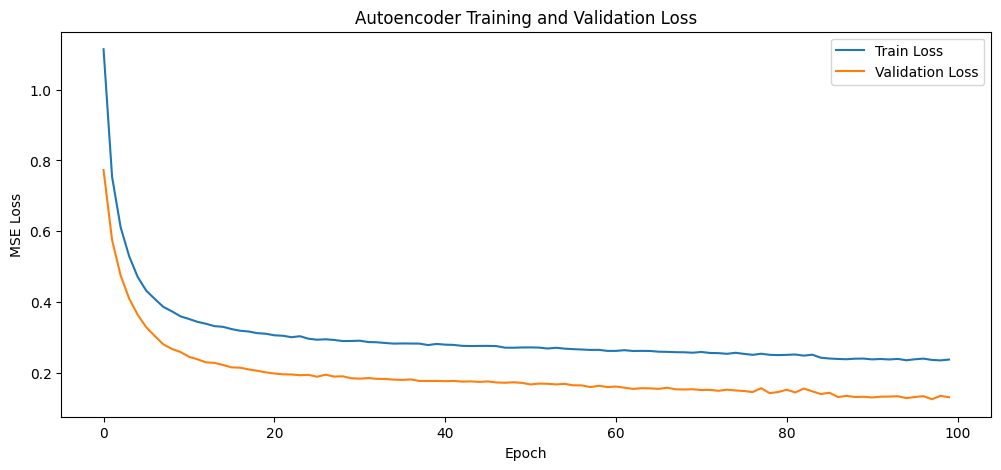

In [ ]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()